In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_probability as tfp
import tf_keras

2025-08-25 11:38:20.440938: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-25 11:38:20.455289: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/kdrabicki/anaconda3/envs/cpu_env/lib/python3.12/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


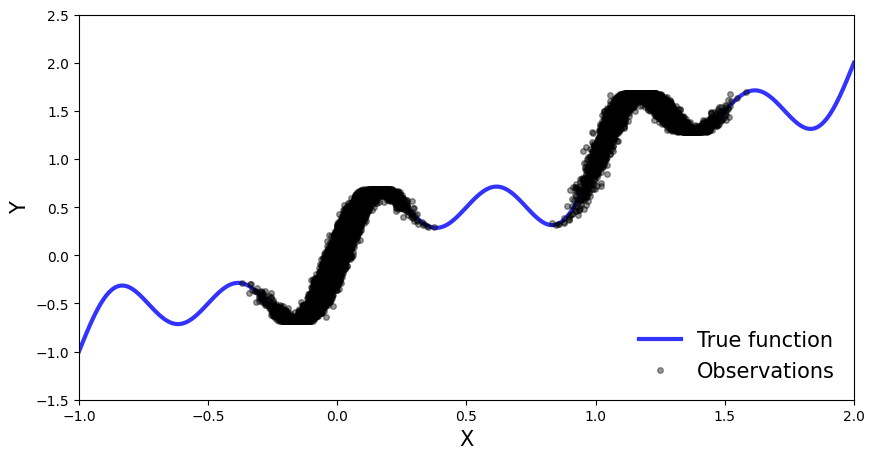

In [2]:
np.random.seed(42+1)

X_train = np.hstack([0.1 * np.random.randn(10000), 0.6 + 0.2 * np.random.randn(0), 1.2 + 0.1 * np.random.randn(10000)])
noise = 0.02 * np.random.randn(X_train.shape[0])
y_train = X_train + 0.3 * np.sin(2 * np.pi * (X_train + noise)) + 0.3 * np.sin(4 * np.pi * (X_train + noise)) + noise

x_true = np.linspace(-1, 2, 1000)
y_true = x_true + 0.3 * np.sin(2 * np.pi * x_true) + 0.3 * np.sin(4 * np.pi * x_true)

xlims = [-1, 2]
ylims = [-1.5, 2.5]

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x_true, y_true, 'b-', linewidth=3, label="True function", alpha=0.8)
ax.plot(X_train, y_train, 'ko', markersize=4, label="Observations", alpha=0.4)
ax.set_xlim(xlims)
ax.set_ylim(ylims)
ax.set_xlabel("X", fontsize=15)
ax.set_ylabel("Y", fontsize=15)
ax.legend(loc=4, fontsize=15, frameon=False)

plt.show()

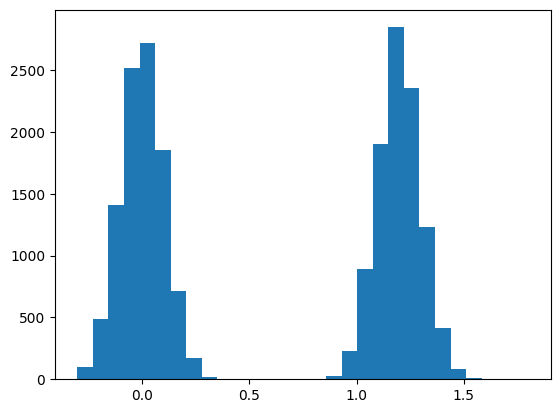

In [3]:
plt.hist(X_train, bins=np.linspace(-0.3, 1.8, 30))
plt.show()

In [39]:
model = tf_keras.Sequential([
    tf_keras.layers.Dense(128, activation='relu', input_shape=(1,)),
    tf_keras.layers.Dense(128, activation='relu'),
    tf_keras.layers.Dense(128, activation='relu'),
    tf_keras.layers.Dense(1)
])

model.compile(optimizer=tf_keras.optimizers.Adam(learning_rate=0.001), loss="MSE")
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 128)               256       
                                                                 
 dense_22 (Dense)            (None, 128)               16512     
                                                                 
 dense_23 (Dense)            (None, 128)               16512     
                                                                 
 dense_24 (Dense)            (None, 1)                 129       
                                                                 
Total params: 33409 (130.50 KB)
Trainable params: 33409 (130.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
x_test = np.linspace(-0.5, 1.5, 1000)
y_test = x_test + 0.3 * np.sin(2 * np.pi * x_test) + 0.3 * np.sin(4 * np.pi * x_test)

history = model.fit(X_train,y_train, validation_data=(x_test, y_test), epochs=40, verbose=1)

Epoch 1/40
63/63 [==============================] - 0s 1ms/step - loss: 0.1663 - val_loss: 0.0972
Epoch 2/40
63/63 [==============================] - 0s 541us/step - loss: 0.0663 - val_loss: 0.0912
Epoch 3/40
63/63 [==============================] - 0s 517us/step - loss: 0.0627 - val_loss: 0.0693
Epoch 4/40
63/63 [==============================] - 0s 503us/step - loss: 0.0593 - val_loss: 0.0589
Epoch 5/40
63/63 [==============================] - 0s 480us/step - loss: 0.0587 - val_loss: 0.0677
Epoch 6/40
63/63 [==============================] - 0s 465us/step - loss: 0.0587 - val_loss: 0.0544
Epoch 7/40
63/63 [==============================] - 0s 460us/step - loss: 0.0586 - val_loss: 0.0547
Epoch 8/40
63/63 [==============================] - 0s 468us/step - loss: 0.0563 - val_loss: 0.0533
Epoch 9/40
63/63 [==============================] - 0s 454us/step - loss: 0.0563 - val_loss: 0.0545
Epoch 10/40
63/63 [==============================] - 0s 464us/step - loss: 0.0557 - val_loss: 0.0498
E

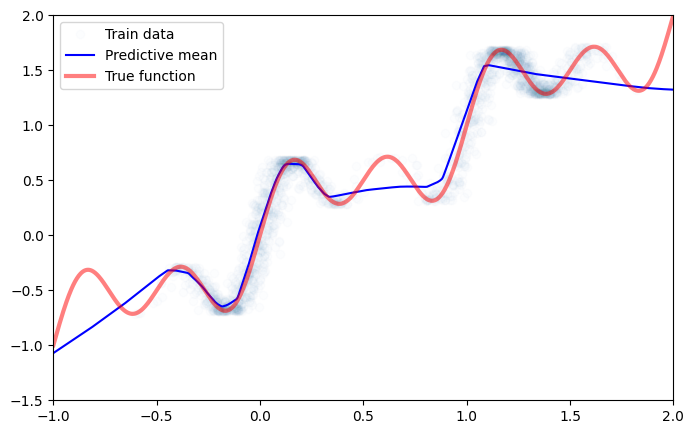

In [41]:
x_test = np.linspace(-1, 2, 1000)
y_test = x_test + 0.3 * np.sin(2 * np.pi * x_test) + 0.3 * np.sin(4 * np.pi * x_test)
y_pred = model(x_test)


import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(X_train, y_train, 'o', label='Train data', alpha=0.01)
plt.plot(x_test, y_pred, 'b', label='Predictive mean')
plt.plot(x_test, y_test, 'r', linewidth=3, label="True function", alpha=0.5)
plt.ylim(-1.5,2)
plt.xlim(-1, 2)
plt.legend()
plt.show()

In [4]:
event_shape = [1]
params_size = tfp.layers.MixtureNormal.params_size(2, event_shape)

model = tf_keras.Sequential([
    tf_keras.layers.Dense(128, activation='relu', input_shape=(1,)),
    tf_keras.layers.Dense(128, activation='relu'),
    tf_keras.layers.Dense(128, activation='relu'),
    tf_keras.layers.Dense(params_size),
    tfp.layers.MixtureNormal(2, event_shape)
])

def negloglik(y_true, y_pred):
    return -y_pred.log_prob(y_true)

model.compile(optimizer=tf_keras.optimizers.Adam(learning_rate=0.001), loss=negloglik)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               256       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                                 
 mixture_normal (MixtureNor  ((None, 1),               0         
 mal)                         (None, 1))                         
                                                                 
Total params: 34054 (133.02 KB)
Trainable params: 34054 (133.02 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [47]:
x_test = np.linspace(-0.5, 1.5, 1000)
y_test = x_test + 0.3 * np.sin(2 * np.pi * x_test) + 0.3 * np.sin(4 * np.pi * x_test)

history = model.fit(X_train,y_train, validation_data=(x_test, y_test), epochs=40, verbose=1)

Epoch 1/40
63/63 [==============================] - 1s 3ms/step - loss: 0.5831 - val_loss: 0.2172
Epoch 2/40
63/63 [==============================] - 0s 585us/step - loss: 0.0141 - val_loss: 0.0419
Epoch 3/40
63/63 [==============================] - 0s 524us/step - loss: -0.0025 - val_loss: 0.0200
Epoch 4/40
63/63 [==============================] - 0s 536us/step - loss: -0.0615 - val_loss: -0.0179
Epoch 5/40
63/63 [==============================] - 0s 545us/step - loss: -0.0517 - val_loss: -0.0358
Epoch 6/40
63/63 [==============================] - 0s 556us/step - loss: -0.0868 - val_loss: -0.0690
Epoch 7/40
63/63 [==============================] - 0s 540us/step - loss: -0.1166 - val_loss: -0.1001
Epoch 8/40
63/63 [==============================] - 0s 516us/step - loss: -0.1444 - val_loss: -0.1356
Epoch 9/40
63/63 [==============================] - 0s 528us/step - loss: -0.1294 - val_loss: -0.1693
Epoch 10/40
63/63 [==============================] - 0s 539us/step - loss: -0.1474 - val_

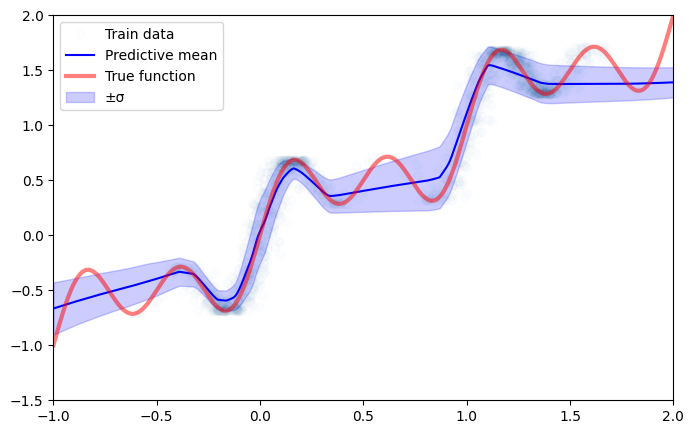

In [48]:
x_test = np.linspace(-1, 2, 1000)
y_test = x_test + 0.3 * np.sin(2 * np.pi * x_test) + 0.3 * np.sin(4 * np.pi * x_test)
y_dist = model(x_test)
y_pred = y_dist.mean().numpy()
y_std = y_dist.stddev().numpy()

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(X_train, y_train, 'o', label='Train data', alpha=0.01)
plt.plot(x_test, y_pred, 'b', label='Predictive mean')
plt.plot(x_test, y_test, 'r', linewidth=3, label="True function", alpha=0.5)
plt.fill_between(x_test.flatten(),
                 (y_pred - y_std).reshape(-1),
                 (y_pred + y_std).reshape(-1),
                 color='blue', alpha=0.2, label='±σ')
plt.ylim(-1.5,2)
plt.xlim(-1, 2)
plt.legend()
plt.show()

In [51]:
tfd = tfp.distributions
tfpl = tfp.layers

batch_num = int(X_train.shape[0] / 128)

scale = X_train.shape[0]

norm_layer = tf_keras.layers.Normalization(input_shape=(1,))
norm_layer.adapt(X_train.reshape(-1,1))

activation = "relu"
model = tf_keras.Sequential([
    norm_layer,
    tfpl.DenseFlipout(128, activation=activation,
                      kernel_divergence_fn=lambda q,p,ignore: tfp.distributions.kl_divergence(q, p) / scale,
                      bias_divergence_fn=lambda q,p,ignore: tfp.distributions.kl_divergence(q, p) / scale),
    tfpl.DenseFlipout(128, activation=activation,
                      kernel_divergence_fn=lambda q,p,ignore: tfp.distributions.kl_divergence(q, p) / scale,
                      bias_divergence_fn=lambda q,p,ignore: tfp.distributions.kl_divergence(q, p) / scale),
    tfpl.DenseFlipout(128, activation=activation,
                      kernel_divergence_fn=lambda q,p,ignore: tfp.distributions.kl_divergence(q, p) / scale,
                      bias_divergence_fn=lambda q,p,ignore: tfp.distributions.kl_divergence(q, p) / scale),
    tf_keras.layers.Dense(1)
])


boundaries = [50 * batch_num]
values = [0.001, 0.0001]
learning_schedule = tf_keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries, values)

model.compile(optimizer=tf_keras.optimizers.Adam(learning_rate=learning_schedule), loss="MSE")
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_12 (Normaliz  (None, 1)                 3         
 ation)                                                          
                                                                 
 dense_flipout_36 (DenseFli  (None, 128)               384       
 pout)                                                           
                                                                 
 dense_flipout_37 (DenseFli  (None, 128)               32896     
 pout)                                                           
                                                                 
 dense_flipout_38 (DenseFli  (None, 128)               32896     
 pout)                                                           
                                                                 
 dense_16 (Dense)            (None, 1)               

In [52]:
x_test = np.linspace(-0.5, 1.5, 1000)
y_test = x_test + 0.3 * np.sin(2 * np.pi * x_test) + 0.3 * np.sin(4 * np.pi * x_test)


loss_log_dir = "../logs/fit/loss/BNN"
history = model.fit(X_train,y_train, validation_data=(x_test, y_test), epochs=1000, verbose=1, batch_size=128,
                    callbacks=[tf_keras.callbacks.TensorBoard(log_dir=loss_log_dir, histogram_freq=1), tf_keras.callbacks.EarlyStopping(monitor='val_loss',
                                                                                                                                        mode='min',
                                                                                                                                        patience=30,
                                                                                                                                        verbose=1,
                                                                                                                                        start_from_epoch=100,
                                                                                                                                        restore_best_weights=True)])

Epoch 1/1000
157/157 [==============================] - 1s 2ms/step - loss: 4.1462 - val_loss: 4.1520
Epoch 2/1000
157/157 [==============================] - 0s 1ms/step - loss: 3.8651 - val_loss: 3.9005
Epoch 3/1000
157/157 [==============================] - 0s 1ms/step - loss: 3.6319 - val_loss: 3.6760
Epoch 4/1000
157/157 [==============================] - 0s 1ms/step - loss: 3.4015 - val_loss: 3.4329
Epoch 5/1000
157/157 [==============================] - 0s 1ms/step - loss: 3.1738 - val_loss: 3.2064
Epoch 6/1000
157/157 [==============================] - 0s 1ms/step - loss: 2.9486 - val_loss: 2.9912
Epoch 7/1000
157/157 [==============================] - 0s 1ms/step - loss: 2.7275 - val_loss: 2.7690
Epoch 8/1000
157/157 [==============================] - 0s 1ms/step - loss: 2.5114 - val_loss: 2.5408
Epoch 9/1000
157/157 [==============================] - 0s 1ms/step - loss: 2.2986 - val_loss: 2.3251
Epoch 10/1000
157/157 [==============================] - 0s 1ms/step - loss: 2.092

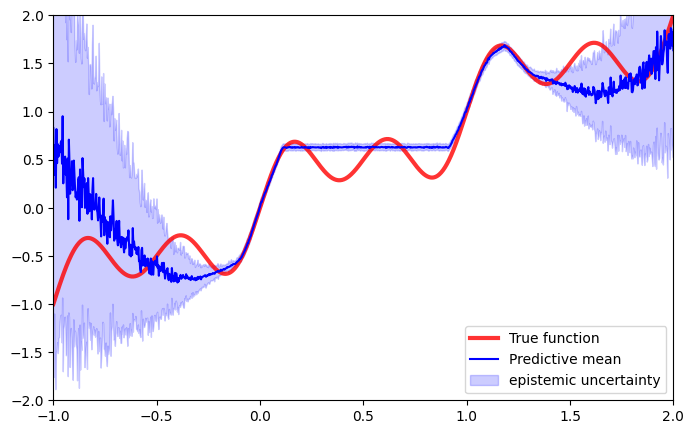

In [56]:
x_test = np.linspace(-1, 2, 1000)
y_test = x_test + 0.3 * np.sin(2 * np.pi * x_test) + 0.3 * np.sin(4 * np.pi * x_test)

means = []
for _ in range(100):
    means.append(model(x_test))

y_mean = np.array(means).mean(axis=0)
y_epistemic_variance = np.array(means).std(axis=0) ** 2
y_std = np.sqrt(y_epistemic_variance)


import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
# plt.plot(X_train, y_train, 'o', label='Train data', alpha=0.1)
plt.plot(x_test, y_test, 'r', linewidth=3, label="True function", alpha=0.8)
plt.plot(x_test, y_mean, color='b', label='Predictive mean')
plt.fill_between(x_test.flatten(),
                 (y_mean - 1 * y_std).reshape(-1),
                 (y_mean + 1 * y_std).reshape(-1),
                 color='blue', alpha=0.2, label='epistemic uncertainty')
plt.ylim(-2,2)
plt.xlim(-1, 2)
plt.legend()
plt.show()

In [72]:
tfd = tfp.distributions
tfpl = tfp.layers

batch_num = int(X_train.shape[0] / 128)

scale = X_train.shape[0]


event_shape = [1]
params_size = tfp.layers.MixtureNormal.params_size(2, event_shape)

norm_layer = tf_keras.layers.Normalization(input_shape=(1,))
norm_layer.adapt(X_train.reshape(-1,1))

activation = "relu"
model = tf_keras.Sequential([
    norm_layer,
    tfpl.DenseFlipout(128, activation=activation,
                      kernel_divergence_fn=lambda q,p,ignore: tfp.distributions.kl_divergence(q, p) / scale,
                      bias_divergence_fn=lambda q,p,ignore: tfp.distributions.kl_divergence(q, p) / scale),
    tfpl.DenseFlipout(128, activation=activation,
                      kernel_divergence_fn=lambda q,p,ignore: tfp.distributions.kl_divergence(q, p) / scale,
                      bias_divergence_fn=lambda q,p,ignore: tfp.distributions.kl_divergence(q, p) / scale),
    tfpl.DenseFlipout(128, activation=activation,
                      kernel_divergence_fn=lambda q,p,ignore: tfp.distributions.kl_divergence(q, p) / scale,
                      bias_divergence_fn=lambda q,p,ignore: tfp.distributions.kl_divergence(q, p) / scale),
    tf_keras.layers.Dense(params_size),
    tfp.layers.MixtureNormal(2, event_shape)
])

def negloglik(y_true, y_pred):
    return -y_pred.log_prob(y_true)



boundaries = [150 * batch_num]
values = [0.001, 0.0001]
learning_schedule = tf_keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries, values)

model.compile(optimizer=tf_keras.optimizers.Adam(learning_rate=learning_schedule), loss=negloglik)
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_16 (Normaliz  (None, 1)                 3         
 ation)                                                          
                                                                 
 dense_flipout_48 (DenseFli  (None, 128)               384       
 pout)                                                           
                                                                 
 dense_flipout_49 (DenseFli  (None, 128)               32896     
 pout)                                                           
                                                                 
 dense_flipout_50 (DenseFli  (None, 128)               32896     
 pout)                                                           
                                                                 
 dense_20 (Dense)            (None, 6)               

In [73]:
x_test = np.linspace(-0.5, 1.5, 1000)
y_test = x_test + 0.3 * np.sin(2 * np.pi * x_test) + 0.3 * np.sin(4 * np.pi * x_test)


loss_log_dir = "../logs/fit/loss/BNN"
history = model.fit(X_train,y_train, validation_data=(x_test, y_test), epochs=1000, verbose=1, batch_size=128,
                    callbacks=[tf_keras.callbacks.TensorBoard(log_dir=loss_log_dir, histogram_freq=1), tf_keras.callbacks.EarlyStopping(monitor='val_loss',
                                                                                                                                        mode='min',
                                                                                                                                        patience=30,
                                                                                                                                        verbose=1,
                                                                                                                                        start_from_epoch=100,
                                                                                                                                        restore_best_weights=True)])

Epoch 1/1000
157/157 [==============================] - 1s 3ms/step - loss: 4.1700 - val_loss: 6.3269
Epoch 2/1000
157/157 [==============================] - 0s 1ms/step - loss: 3.6751 - val_loss: 5.1694
Epoch 3/1000
157/157 [==============================] - 0s 1ms/step - loss: 3.4369 - val_loss: 4.8336
Epoch 4/1000
157/157 [==============================] - 0s 1ms/step - loss: 3.2342 - val_loss: 4.3109
Epoch 5/1000
157/157 [==============================] - 0s 1ms/step - loss: 3.0344 - val_loss: 3.8472
Epoch 6/1000
157/157 [==============================] - 0s 1ms/step - loss: 2.8031 - val_loss: 4.0293
Epoch 7/1000
157/157 [==============================] - 0s 1ms/step - loss: 2.5989 - val_loss: 4.2359
Epoch 8/1000
157/157 [==============================] - 0s 1ms/step - loss: 2.4200 - val_loss: 3.7458
Epoch 9/1000
157/157 [==============================] - 0s 1ms/step - loss: 2.2371 - val_loss: 2.8187
Epoch 10/1000
157/157 [==============================] - 0s 1ms/step - loss: 2.078

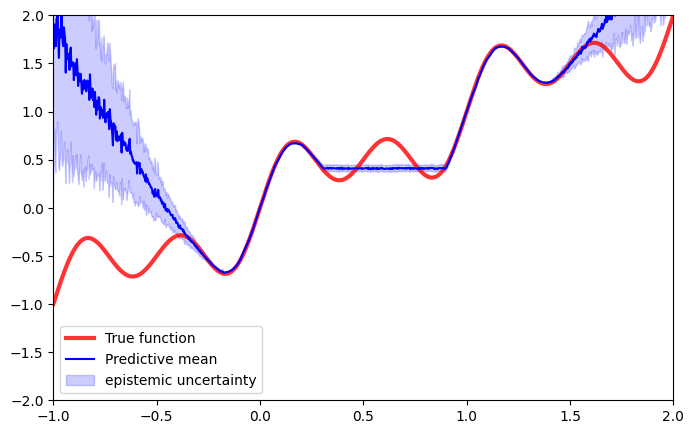

In [77]:
x_test = np.linspace(-1, 2, 1000)
y_test = x_test + 0.3 * np.sin(2 * np.pi * x_test) + 0.3 * np.sin(4 * np.pi * x_test)

means = []
variances = []
for _ in range(100):
    dist = model(x_test)
    means.append(dist.mean().numpy())
    variances.append(dist.variance().numpy())

y_mean = np.array(means).mean(axis=0)
y_aleatoric_variance = np.array(variances).mean(axis=0)
y_epistemic_variance = np.array(means).std(axis=0) ** 2
y_std = np.sqrt(y_epistemic_variance)


import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
# plt.plot(X_train, y_train, 'kx', label='Train data')
plt.plot(x_test, y_test, 'r', linewidth=3, label="True function", alpha=0.8)
plt.plot(x_test, y_mean, color='b', label='Predictive mean')
plt.fill_between(x_test.flatten(),
                 (y_mean - 1 * y_std).reshape(-1),
                 (y_mean + 1 * y_std).reshape(-1),
                 color='blue', alpha=0.2, label='epistemic uncertainty')
plt.ylim(-2,2)
plt.xlim(-1, 2)
plt.legend()
plt.show()

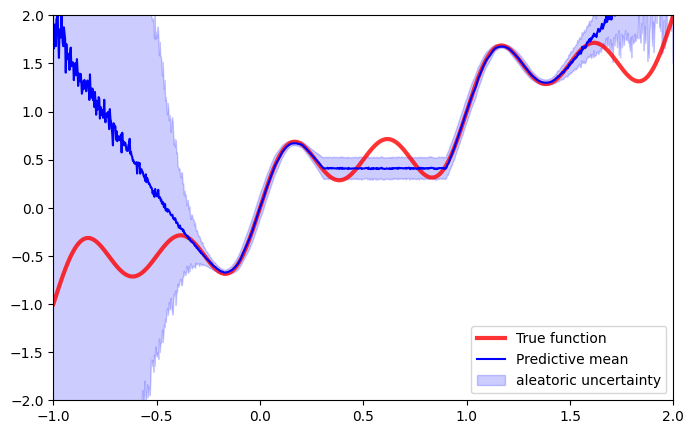

In [78]:
## NIE WIEM CZY TO POPRAWNE, WYDAJE MI SIĘ, ŻE EPISTEMIC TEŻ TU WYCHODZI

y_std = np.sqrt(y_aleatoric_variance)

plt.figure(figsize=(8,5))
# plt.plot(X_train, y_train, 'kx', label='Train data')
plt.plot(x_test, y_test, 'r', linewidth=3, label="True function", alpha=0.8)
plt.plot(x_test, y_mean, color='b', label='Predictive mean')
plt.fill_between(x_test.flatten(),
                 (y_mean - 1 * y_std).reshape(-1),
                 (y_mean + 1 * y_std).reshape(-1),
                 color='blue', alpha=0.2, label='aleatoric uncertainty')
plt.ylim(-2,2)
plt.xlim(-1, 2)
plt.legend()
plt.show()

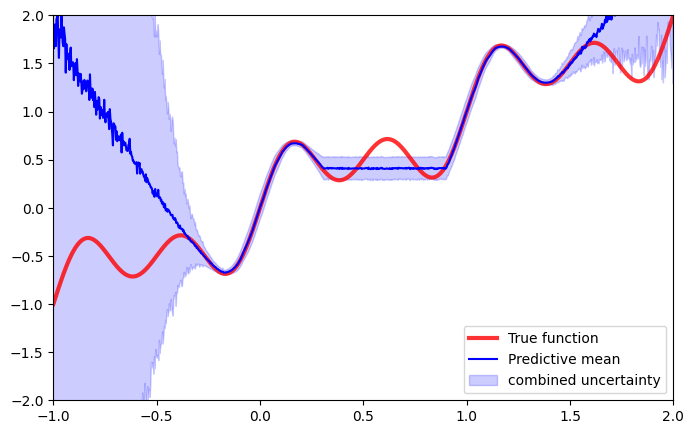

In [79]:
y_std = np.sqrt(y_epistemic_variance + 1.0 * y_aleatoric_variance)
plt.figure(figsize=(8,5))
# plt.plot(X_train, y_train, 'kx', label='Train data')
plt.plot(x_test, y_test, 'r', linewidth=3, label="True function", alpha=0.8)
plt.plot(x_test, y_mean, color='b', label='Predictive mean')
plt.fill_between(x_test.flatten(),
                 (y_mean - 1 * y_std).reshape(-1),
                 (y_mean + 1 * y_std).reshape(-1),
                 color='blue', alpha=0.2, label='combined uncertainty')
plt.ylim(-2,2)
plt.xlim(-1, 2)
plt.legend()
plt.show()

In [189]:
num_mc_samples = 1000
num_y_samples  = 1000

all_y_samples = []

for i in range(num_mc_samples):
    pred_dist = model(x_test)
    y_samples = pred_dist.sample(num_y_samples)
    all_y_samples.append(y_samples)   

all_y_samples = tf.stack(all_y_samples, axis=0)
predictive_mean = tf.reduce_mean(all_y_samples, axis=[0,1])   # [batch, output_dim]
predictive_var  = tf.math.reduce_variance(all_y_samples, axis=[0,1])  # [batch, output_dim]
mc_std  = tf.sqrt(predictive_var)

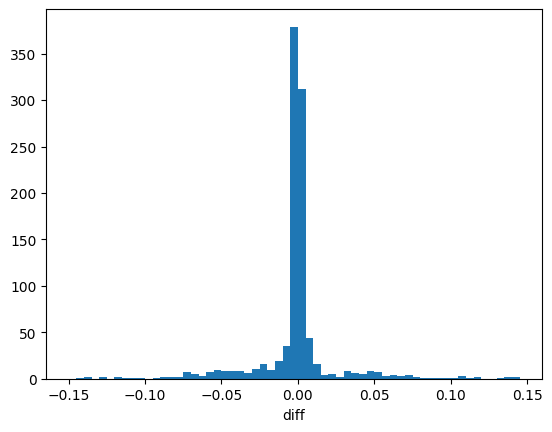

In [190]:
plt.hist(y_std - mc_std.numpy(), bins=np.arange(-0.15, 0.15, 0.005))
plt.xlabel("diff")
plt.savefig("std_diff.png")
plt.show()

True value: -0.5918083830114538
Analytical std: 1.094120740890503
MC std: 1.1281580924987793


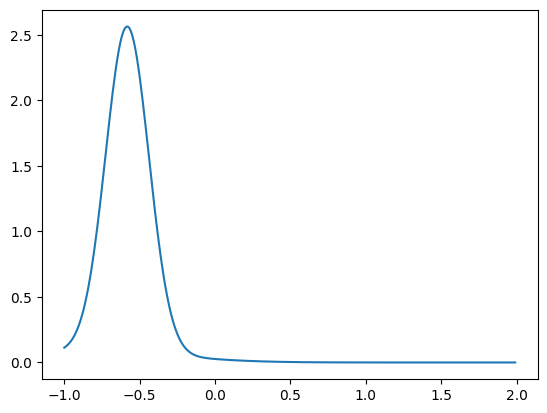

In [191]:
n = 100
print("True value:",y_test[n:n+1].item())
print("Analytical std:", y_std[n:n+1].item())
print("MC std:", mc_std[n:n+1].numpy().item())
dist = model(x_test[n:n+1])
points = np.arange(-1,2,0.01)

log_probs = []
for point in points:
    log_probs.append(dist.log_prob(point))

log_probs = np.exp(np.array(log_probs))
plt.plot(points, log_probs)
plt.show()

In [186]:
y_std ** 2 - mc_std.numpy() ** 2

array([[-2.61217952e-01],
       [-2.31023312e-01],
       [ 2.73215771e-02],
       [ 6.41822815e-02],
       [ 1.51300430e-03],
       [-2.07426548e-02],
       [-5.08723259e-02],
       [ 4.45986748e-01],
       [ 7.82542229e-02],
       [-4.71215248e-02],
       [-4.57947254e-02],
       [ 1.66706800e-01],
       [ 1.46799684e-01],
       [-2.30400562e-02],
       [-7.23768473e-02],
       [-1.25402570e-01],
       [ 2.61098742e-01],
       [ 7.07488060e-02],
       [ 1.09245777e-01],
       [-1.01891875e-01],
       [-8.62867832e-02],
       [-3.69653106e-01],
       [-1.36720181e-01],
       [-2.67447710e-01],
       [-6.86867237e-02],
       [ 2.94064760e-01],
       [ 1.56761646e-01],
       [-9.73253250e-02],
       [ 1.16933942e-01],
       [ 2.56445885e-01],
       [-1.78837299e-01],
       [ 2.08085895e-01],
       [ 2.46391058e-01],
       [-3.87472391e-01],
       [-2.51800179e-01],
       [-1.08587980e-01],
       [ 1.97070956e-01],
       [ 3.99262547e-01],
       [ 1.5

In [147]:
## ---- REDSHIFT DATA ----

In [197]:
# import importlib

# import data_frame
# import models

In [376]:
# importlib.reload(data_frame)
# importlib.reload(models)

# filePath = "../KiDS-DR5-WCScut_x_DESI-DR1-small.fits"
# df = data_frame.DataFrame(filePath, "QSO", data_frame.MaxFiller())

# config = {}
# model = models.MLModelContext(strategy=models.BayesianNN(df, config))

/home/kdrabicki/anaconda3/envs/cpu_env/lib/python3.12/site-packages/tensorflow_probability/python/layers/util.py:99: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  loc = add_variable_fn(
/home/kdrabicki/anaconda3/envs/cpu_env/lib/python3.12/site-packages/tf_keras/src/initializers/initializers.py:121: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(
/home/kdrabicki/anaconda3/envs/cpu_env/lib/python3.12/site-packages/tensorflow_probability/python/layers/util.py:109: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  untransformed_scale = add_vari

In [377]:
# model.train()

Epoch 1/1000
889/889 [==============================] - 5s 4ms/step - loss: 9.0585 - val_loss: 8.3339
Epoch 2/1000
889/889 [==============================] - 3s 4ms/step - loss: 8.2290 - val_loss: 8.1297
Epoch 3/1000
889/889 [==============================] - 3s 4ms/step - loss: 8.0620 - val_loss: 8.0023
Epoch 4/1000
889/889 [==============================] - 3s 4ms/step - loss: 7.9398 - val_loss: 7.8830
Epoch 5/1000
889/889 [==============================] - 3s 4ms/step - loss: 7.8259 - val_loss: 7.7655
Epoch 6/1000
889/889 [==============================] - 3s 4ms/step - loss: 7.7156 - val_loss: 7.6712
Epoch 7/1000
889/889 [==============================] - 3s 4ms/step - loss: 7.6240 - val_loss: 7.5824
Epoch 8/1000
889/889 [==============================] - 3s 4ms/step - loss: 7.5384 - val_loss: 7.4927
Epoch 9/1000
889/889 [==============================] - 3s 4ms/step - loss: 7.4609 - val_loss: 7.4115
Epoch 10/1000
889/889 [==============================] - 3s 4ms/step - loss: 7.381

KeyboardInterrupt: 

In [204]:
# scaler = model.strategy.scaler
# X_test, y_test = df.get_random_test_dataset()
# X_faint, y_faint = df.get_faint_test_dataset()
# X_test = scaler.transform(X_test)
# X_faint = scaler.transform(X_faint)

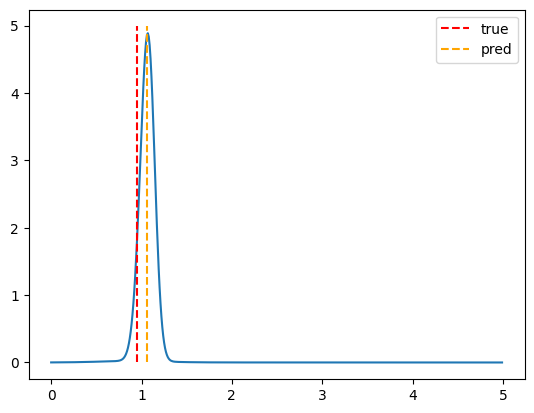

Epistemic error: 0.03
Aleatoric error: 0.10


In [367]:
# sample = 4
# probs = []
# means = []
# variances = []
# for _ in range(8):
#     dist = model.strategy.network(X_faint[sample:sample+1])
#     points = np.arange(0,5,0.01)
#     log_prob = [dist.log_prob(point) for point in points]
#     log_prob = np.array(log_prob)
#     prob = np.exp(log_prob)
#     probs.append(prob)
#     means.append(dist.mean())
#     variances.append(dist.variance())

# probs = np.array(probs).mean(axis=0)
# mean = np.array(means).mean(axis=0)

# plt.plot(points, probs)
# plt.vlines(x=y_faint[sample:sample+1], ymin=0, ymax=probs.max() + 0.1, color="r", linestyles="dashed", label="true")
# plt.vlines(x=mean, ymin=0, ymax=probs.max() + 0.1, color="orange", linestyles="dashed", label="pred")
# plt.legend()
# plt.show()

# print(f"Epistemic error: {np.array(means).std(axis=0).item():.2f}")
# print(f"Aleatoric error: {np.sqrt(np.array(variances).mean(axis=0).item()):.2f}")